In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

## Initialize Dataset

In [2]:
n_samples = 400
std_dev = 1.5

Y_mean = (6.5, 5.5)
N_mean = (3.0,2.0)

In [3]:
def generate_dataset(mean, std_dev):
    np.random.seed(14)
    x_axis = np.random.normal(loc=mean[0], scale=std_dev, size=int(n_samples/2))
    y_axis = np.random.normal(loc=mean[1], scale=std_dev, size=int(n_samples/2))
    return np.transpose((x_axis, y_axis))

In [4]:
Y_data = generate_dataset(Y_mean, std_dev)
N_data = generate_dataset(N_mean, std_dev)

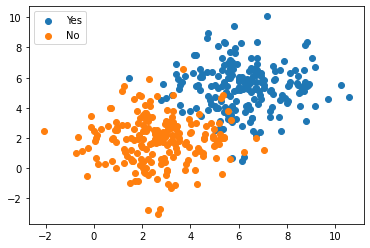

In [5]:
plt.scatter(Y_data[:,0], Y_data[:,1])
plt.scatter(N_data[:,0], N_data[:,1])
plt.legend(['Yes', 'No'])

In [6]:
Y_data = np.append(Y_data, np.ones((200,1)), axis=1)
N_data = np.append(N_data, np.zeros((200,1)), axis=1)

data = np.concatenate([Y_data, N_data])

In [7]:
print(data.shape)
print()
print(data[:5])
print()
print(data[-5:])

(400, 3)

[[8.82700867 8.38049208 1.        ]
 [6.61877904 4.5680135  1.        ]
 [6.76096479 8.34096156 1.        ]
 [6.39149515 4.18470989 1.        ]
 [3.4935059  5.93503598 1.        ]]

[[3.54191414 2.31483602 0.        ]
 [0.90956773 3.06165266 0.        ]
 [3.06859276 2.5918089  0.        ]
 [3.01753821 1.53954429 0.        ]
 [2.32080406 1.61804941 0.        ]]


**last column is the label**

## Split Train and Test Set

In [8]:
np.random.seed(14)
np.random.shuffle(data)

In [9]:
data[:10]

array([[ 3.64896198,  5.69586821,  1.        ],
       [ 4.74181731,  4.76673602,  1.        ],
       [ 6.61877904,  4.5680135 ,  1.        ],
       [ 0.0797832 ,  2.01743968,  0.        ],
       [ 3.23575753,  3.00722843,  1.        ],
       [ 5.73293541,  3.05106684,  1.        ],
       [ 5.03170394,  1.54092955,  0.        ],
       [ 3.5797832 ,  5.51743968,  1.        ],
       [ 7.42915277,  6.79353612,  1.        ],
       [ 5.2919024 , -0.39438921,  0.        ]])

In [10]:
train_ratio = 0.7

train_data = data[:int(0.7*n_samples)]
test_data = data[int(-0.3*n_samples):]

print(f'shape for X_train: {train_data.shape}')
print(f'shape for X_test: {test_data.shape}')

shape for X_train: (280, 3)
shape for X_test: (120, 3)


## Creating Model

- activation function: sigmoid
- loss function: sum of squared

In [11]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sigmoid_v = np.vectorize(sigmoid)

In [12]:
def apply_threshold(x, threshold=0.5):
    if x >= threshold:
        return 1.0
    else:
        return 0.0
    
apply_threshold_v = np.vectorize(apply_threshold)  

## Stochastic Gradient Descent v1

In [13]:
def stochastic_gradient_descent(data, alpha=0.01, iteration=2500, theshold=0.5):
    # [1, x1, x2]
    data = np.append(np.ones((len(data),1)), data, axis=1)
    # [bias, theta1, theta2]
    np.random.seed(14)
    thetas = np.random.rand(len(data[0])-1)
    
    loss_history = []
    accuracy_history = []
    thetas_history = []
    
    X = data[:,:3]
    y = data[:,-1]
    
    for current_iteration in range(iteration):
        sum_loss = 0.0
        sum_accuracy = []
        
        #select random sample
        i = np.random.randint(0, len(X))
        hx = sigmoid(np.dot(X[i], thetas.T))
        thetas = thetas - np.multiply(X[i], alpha*(2*(hx - y[i])*hx*(1 - hx)))
        
        # to calculate losses n accuracy
        hx = sigmoid_v(np.dot(X, thetas.T))
        sum_loss = ((hx-y)**2).sum()
        predicted_y = apply_threshold_v(hx)
        sum_accuracy = predicted_y == y
        
        accuracy = np.sum(sum_accuracy)/len(X)
        if current_iteration % 200 == 0:
            print(f'Epoch: {current_iteration}')
            print(f'    losses: {sum_loss}')
            print(f'    accuracy: {accuracy}')
        
        thetas_history.append(thetas)
        loss_history.append(sum_loss)
        accuracy_history.append(accuracy)
        
    return loss_history, accuracy_history, thetas_history

In [14]:
loss_history, accuracy_history, thetas_history = stochastic_gradient_descent(train_data, alpha=0.1,)

Epoch: 0
    losses: 125.07397745228576
    accuracy: 0.5178571428571429
Epoch: 200
    losses: 55.896015064459135
    accuracy: 0.6964285714285714
Epoch: 400
    losses: 36.069313464443134
    accuracy: 0.7964285714285714
Epoch: 600
    losses: 27.238103904110513
    accuracy: 0.9071428571428571
Epoch: 800
    losses: 29.534766753899234
    accuracy: 0.8464285714285714
Epoch: 1000
    losses: 35.63891599740056
    accuracy: 0.8107142857142857
Epoch: 1200
    losses: 20.793743086834105
    accuracy: 0.9392857142857143
Epoch: 1400
    losses: 19.263865236070043
    accuracy: 0.9214285714285714
Epoch: 1600
    losses: 19.411043843427013
    accuracy: 0.9142857142857143
Epoch: 1800
    losses: 40.73390027367274
    accuracy: 0.7857142857142857
Epoch: 2000
    losses: 21.98301905796471
    accuracy: 0.8785714285714286
Epoch: 2200
    losses: 17.141800121540037
    accuracy: 0.9392857142857143
Epoch: 2400
    losses: 17.36897905475164
    accuracy: 0.9357142857142857


Text(0, 0.5, 'Sum of Squared Error')

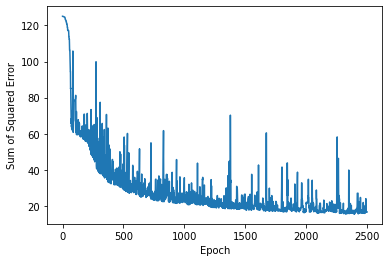

In [15]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

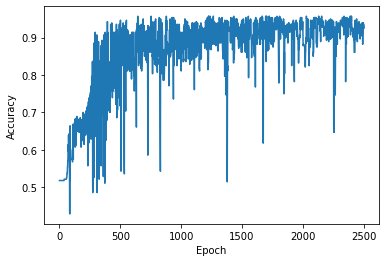

In [16]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

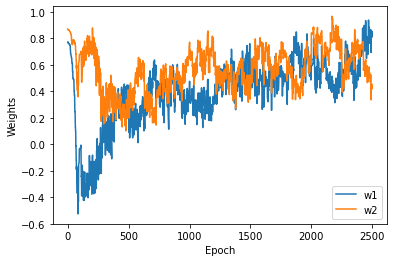

In [17]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])

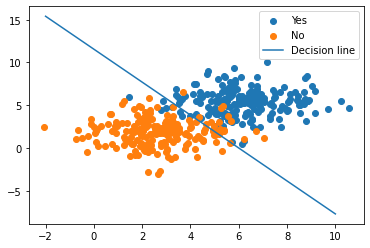

In [18]:
thetas = thetas_history[-1]

plt.scatter(Y_data[:,0], Y_data[:,1])
plt.scatter(N_data[:,0], N_data[:,1])

x = np.linspace(-2.0, 10.0, 3)
y = -(thetas[0] + thetas[1]*x)/thetas[2]
plt.plot(x, y)
plt.legend(['Yes', 'No', 'Decision line'])

In [19]:
total_label = np.unique(test_data[:,-1], return_counts=True)
print(total_label)

true_positive_counter = 0
true_negative_counter = 0
true = 0


test_data_new = np.append(np.ones((len(test_data),1)), test_data, axis=1)
X = test_data_new[:,:3]
y = test_data_new[:,-1]

for i in range(len(test_data_new)):
    hx = sigmoid(np.dot(X[i], thetas))
    predicted_y = apply_threshold(hx)
    
    if y[i] == 1.0:
        if predicted_y == y[i]:
            true_positive_counter += 1
            true += 1
    
    else:
        if predicted_y == y[i]:
            true_negative_counter += 1
            true += 1

print()
print(f'Accuracy: {true/len(test_data)}')
print(f'YES class: {true_positive_counter/total_label[1][1]}')
print(f'N0 class: {true_negative_counter/total_label[1][0]}')

(array([0., 1.]), array([64, 56], dtype=int64))

Accuracy: 0.925
YES class: 0.9285714285714286
N0 class: 0.921875


## Batch Gradient Descent

In [20]:
def batch_gradient_descent(data, alpha=0.01, epoch=100, theshold=0.5):
    # [1, x1, x2]
    data = np.append(np.ones((len(data),1)), data, axis=1)
    # [bias, theta1, theta2]
    np.random.seed(14)
    thetas = np.random.rand(len(data[0])-1)
    
    loss_history = []
    accuracy_history = []
    thetas_history = []
    for current_epoch in range(epoch):
        sum_loss = 0.0
        sum_accuracy = []
        
        #shuffle to prevent cycles
        np.random.seed(14)
        np.random.shuffle(data)
        X = data[:,:3]
        y = data[:,-1]
        hx = sigmoid_v(np.dot(X, thetas.T))
             
        thetas = thetas - alpha*np.sum(((2*(hx - y)*hx*(1 - hx)).reshape(-1, 1) * X), axis=0)
        
        hx = sigmoid_v(np.dot(X, thetas.T))
        sum_loss = ((hx-y)**2).sum()
        predicted_y = apply_threshold_v(hx)
        sum_accuracy = predicted_y == y
             
        accuracy = np.sum(sum_accuracy)/len(X)
        if current_epoch % 10 == 0:
            print(f'Epoch: {current_epoch}')
            print(f'    losses: {sum_loss}')
            print(f'    accuracy: {accuracy}')
        loss_history.append(sum_loss)
        accuracy_history.append(accuracy)
        thetas_history.append(thetas)

    return loss_history, accuracy_history, thetas_history

In [21]:
loss_history, accuracy_history, thetas_history = batch_gradient_descent(train_data, alpha=0.001, epoch=200)

Epoch: 0
    losses: 124.77802064349669
    accuracy: 0.5178571428571429
Epoch: 10
    losses: 120.03459847471146
    accuracy: 0.5214285714285715
Epoch: 20
    losses: 102.37940650078545
    accuracy: 0.5214285714285715
Epoch: 30
    losses: 58.76619652252228
    accuracy: 0.6464285714285715
Epoch: 40
    losses: 54.78340270755834
    accuracy: 0.6607142857142857
Epoch: 50
    losses: 51.103861222836734
    accuracy: 0.6821428571428572
Epoch: 60
    losses: 47.795052454855636
    accuracy: 0.7178571428571429
Epoch: 70
    losses: 44.86257747682041
    accuracy: 0.7678571428571429
Epoch: 80
    losses: 42.28093127966183
    accuracy: 0.8107142857142857
Epoch: 90
    losses: 40.01349748018042
    accuracy: 0.8392857142857143
Epoch: 100
    losses: 38.021597568971416
    accuracy: 0.85
Epoch: 110
    losses: 36.268361697335706
    accuracy: 0.8714285714285714
Epoch: 120
    losses: 34.720417934211575
    accuracy: 0.8857142857142857
Epoch: 130
    losses: 33.348492070935876
    accuracy:

Text(0, 0.5, 'Sum of Squared Error')

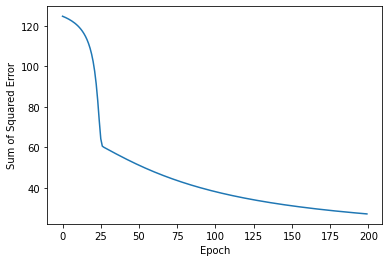

In [22]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

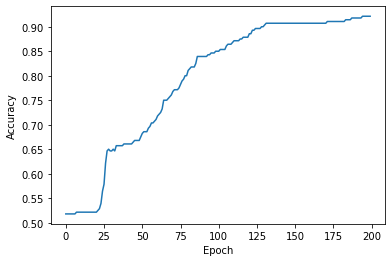

In [23]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

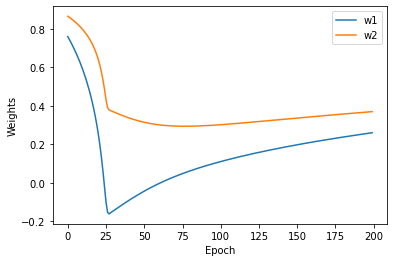

In [24]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])

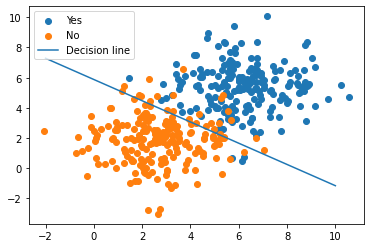

In [25]:
thetas = thetas_history[-1]

plt.scatter(Y_data[:,0], Y_data[:,1])
plt.scatter(N_data[:,0], N_data[:,1])

x = np.linspace(-2.0, 10.0, 3)
y = -(thetas[0] + thetas[1]*x)/thetas[2]
plt.plot(x, y)
plt.legend(['Yes', 'No', 'Decision line'])

In [26]:
total_label = np.unique(test_data[:,-1], return_counts=True)
print(total_label)
# thetas = thetas_history[-1]

true_positive_counter = 0
true_negative_counter = 0
true = 0

test_data_new = np.append(np.ones((len(test_data),1)), test_data, axis=1)
X = test_data_new[:,:3]
y = test_data_new[:,-1]

for i in range(len(test_data_new)):
    hx = sigmoid(np.dot(X[i], thetas))
    predicted_y = apply_threshold(hx)
    
    if y[i] == 1.0:
        if predicted_y == y[i]:
            true_positive_counter += 1
            true += 1
    
    else:
        if predicted_y == y[i]:
            true_negative_counter += 1
            true += 1

print()
print(f'Accuracy: {true/len(test_data)}')
print(f'YES class: {true_positive_counter/total_label[1][1]}')
print(f'N0 class: {true_negative_counter/total_label[1][0]}')

(array([0., 1.]), array([64, 56], dtype=int64))

Accuracy: 0.9416666666666667
YES class: 1.0
N0 class: 0.890625


## BGD with Varied Dataset

In [27]:
n_samples = 400

Y_mean = (7.5, 5.5)
N_mean = (4.0,2.0)

In [28]:
def generate_dataset(mean, std_dev, size):
    np.random.seed(14)
    x_axis = np.random.lognormal(mean=mean[0], sigma=std_dev, size=size)
    y_axis = np.random.lognormal(mean=mean[1], sigma=std_dev, size=size)
    
    return np.transpose((x_axis, y_axis))

In [29]:
Y_data = generate_dataset(Y_mean, 2.0, int(n_samples/4*3))
N_data = generate_dataset(N_mean, 2.4, int(n_samples/4))

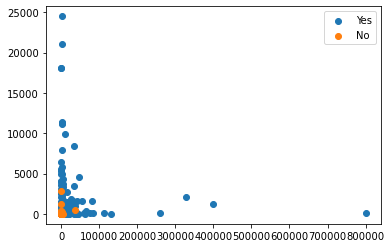

In [30]:
plt.scatter(Y_data[:,0], Y_data[:,1])
plt.scatter(N_data[:,0], N_data[:,1])
plt.legend(['Yes', 'No'])

In [31]:
np.random.seed(14)
np.random.shuffle(data)

print(data[:10])
print()


train_ratio = 0.7

train_data = data[:int(0.7*n_samples)]
test_data = data[int(-0.3*n_samples):]

print(f'shape for X_train: {train_data.shape}')
print(f'shape for X_test: {test_data.shape}')

[[ 1.24181731  1.26673602  0.        ]
 [ 5.55347221  6.37901384  1.        ]
 [ 4.74181731  4.76673602  1.        ]
 [-0.26424247 -0.49277157  0.        ]
 [ 3.20417623  2.9768812   0.        ]
 [ 2.82419006  2.29366243  0.        ]
 [ 1.23855711  5.45475184  0.        ]
 [ 5.44850864  8.30544255  1.        ]
 [ 5.54288769  5.99141002  1.        ]
 [ 6.02533869  5.89380532  1.        ]]

shape for X_train: (280, 3)
shape for X_test: (120, 3)


In [32]:
loss_history, accuracy_history, thetas_history = batch_gradient_descent(train_data, alpha=0.001, epoch=200)

Epoch: 0
    losses: 128.95971619519648
    accuracy: 0.5
Epoch: 10
    losses: 123.80622673122781
    accuracy: 0.5035714285714286
Epoch: 20
    losses: 105.67404488417245
    accuracy: 0.5071428571428571
Epoch: 30
    losses: 60.92453338500309
    accuracy: 0.6142857142857143
Epoch: 40
    losses: 55.69145475972728
    accuracy: 0.6464285714285715
Epoch: 50
    losses: 51.190284273539746
    accuracy: 0.6714285714285714
Epoch: 60
    losses: 47.37097767106796
    accuracy: 0.7428571428571429
Epoch: 70
    losses: 44.11386316823418
    accuracy: 0.7964285714285714
Epoch: 80
    losses: 41.3228558809829
    accuracy: 0.8214285714285714
Epoch: 90
    losses: 38.9224926030913
    accuracy: 0.8428571428571429
Epoch: 100
    losses: 36.849581412715516
    accuracy: 0.8785714285714286
Epoch: 110
    losses: 35.05054540188148
    accuracy: 0.8892857142857142
Epoch: 120
    losses: 33.48046699493969
    accuracy: 0.8928571428571429
Epoch: 130
    losses: 32.10214389171165
    accuracy: 0.9107

Text(0, 0.5, 'Sum of Squared Error')

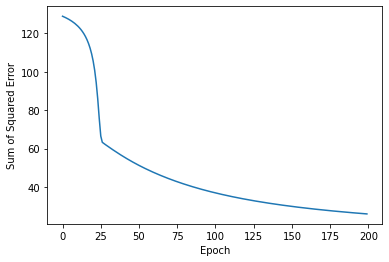

In [33]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

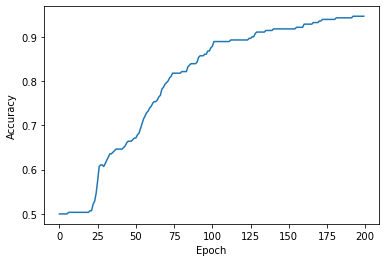

In [34]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

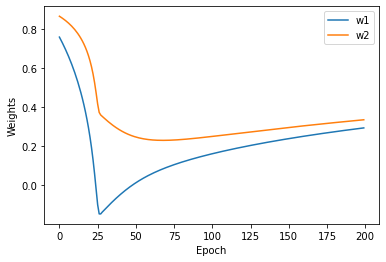

In [35]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])

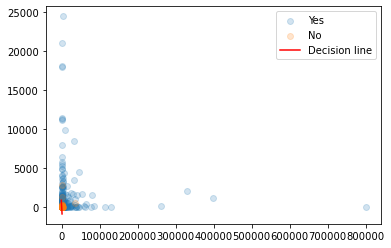

In [36]:
thetas = thetas_history[-1]

plt.scatter(Y_data[:,0], Y_data[:,1], alpha=0.2)
plt.scatter(N_data[:,0], N_data[:,1], alpha=0.2)

x = np.linspace(-1000, 1000, 3)
y = -(thetas[0] + thetas[1]*x)/thetas[2]
plt.plot(x, y, 'red')
plt.legend(['Yes', 'No', 'Decision line'])

(-10.0, 100.0)

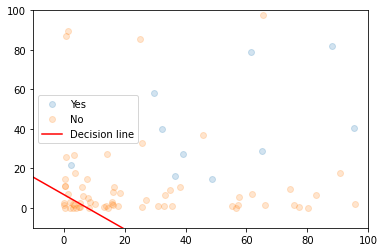

In [37]:
plt.scatter(Y_data[:,0], Y_data[:,1], alpha=0.2)
plt.scatter(N_data[:,0], N_data[:,1], alpha=0.2)

x = np.linspace(-1000, 1000, 3)
y = -(thetas[0] + thetas[1]*x)/thetas[2]
plt.plot(x, y, 'red')
plt.legend(['Yes', 'No', 'Decision line'])

plt.xlim(right=100) #xmax is your value
plt.xlim(left=-10) #xmin is your value
plt.ylim(top=100) #ymax is your value
plt.ylim(bottom=-10)

^ zoomed in

In [38]:
total_label = np.unique(test_data[:,-1], return_counts=True)
print(total_label)
# thetas = thetas_history[-1]

true_positive_counter = 0
true_negative_counter = 0

test_data_new = np.append(np.ones((len(test_data),1)), test_data, axis=1)
X = test_data_new[:,:3]
y = test_data_new[:,-1]

for i in range(len(test_data_new)):
    hx = sigmoid(np.dot(X[i], thetas))
    predicted_y = apply_threshold(hx)
    
    if y[i] == 1.0:
        if predicted_y == y[i]:
            true_positive_counter += 1
    
    else:
        if predicted_y == y[i]:
            true_negative_counter += 1

print()
print(f'Accuracy: {true/len(test_data)}')
print(f'YES class: {true_positive_counter/total_label[1][1]}')
print(f'N0 class: {true_negative_counter/total_label[1][0]}')

(array([0., 1.]), array([57, 63], dtype=int64))

Accuracy: 0.9416666666666667
YES class: 0.9682539682539683
N0 class: 0.9649122807017544


## Questions to Ponder Upon

1. **Which one is 'smoother' and why is that?**
    
    BGD because it does gradient descent using all the data available.
    

2. **Which one converges faster and why is that?**
    
    SGD because it use only 1 data per iteration.
    

3. **What happens to the weights as the algorithm converges?**

    The weights would be at optimal state that could produce lowest losses and highest accuracies.
    

4. **What is the difference between SGD, BGD and Mini BGD?**

    SGD: update weights based on 1 random sample from data
    
    BGD: update weights based on all available data
    
    Mini BGD: update weights based on subset of available data





## (ARCHIVE) Stochastic Gradient Descent v2

In [39]:
def online_stochastic_gradient_descent(data, alpha=0.01, epoch=100, theshold=0.5):
    # [1, x1, x2]
    data = np.append(np.ones((len(data),1)), data, axis=1)
    # [bias, theta1, theta2]
    np.random.seed(14)
    thetas = np.random.rand(len(data[0])-1)
    
    loss_history = []
    accuracy_history = []
    thetas_history = []
    
    for current_epoch in range(epoch):
        sum_loss = 0.0
        sum_accuracy = []
        
        #shuffle to prevent cycles
        np.random.seed(14)
        np.random.shuffle(data)
        X = data[:,:3]
        y = data[:,-1]
        
        for i in range(len(data)):
            hx = sigmoid(np.dot(X[i], thetas.T))
            thetas = thetas - np.multiply(X[i], alpha*(2*(hx - y[i])*hx*(1 - hx)))
            
            sum_loss += (hx-y[i])**2
            predicted_y = apply_threshold(hx)
            sum_accuracy.append(predicted_y == y[i])
            
        accuracy = sum_accuracy.count(True)/len(X)
        print(f'Epoch: {current_epoch}')
        print(f'    losses: {sum_loss}')
        print(f'    accuracy: {accuracy}')
        
        thetas_history.append(thetas)
        loss_history.append(sum_loss)
        accuracy_history.append(accuracy)
        
    return loss_history, accuracy_history, thetas_history

In [40]:
loss_history, accuracy_history, thetas_history = online_stochastic_gradient_descent(train_data)

Epoch: 0
    losses: 127.23974155753918
    accuracy: 0.5
Epoch: 1
    losses: 118.3165448033635
    accuracy: 0.5035714285714286
Epoch: 2
    losses: 77.00125434568301
    accuracy: 0.5607142857142857
Epoch: 3
    losses: 59.87862353066243
    accuracy: 0.6071428571428571
Epoch: 4
    losses: 54.81203705754837
    accuracy: 0.6607142857142857
Epoch: 5
    losses: 50.531923929247405
    accuracy: 0.7
Epoch: 6
    losses: 46.91172365918137
    accuracy: 0.7571428571428571
Epoch: 7
    losses: 43.54794536397693
    accuracy: 0.8
Epoch: 8
    losses: 41.18112573208307
    accuracy: 0.8357142857142857
Epoch: 9
    losses: 38.92072345734736
    accuracy: 0.8607142857142858
Epoch: 10
    losses: 37.03161725798314
    accuracy: 0.8642857142857143
Epoch: 11
    losses: 35.09523018558088
    accuracy: 0.8785714285714286
Epoch: 12
    losses: 33.649853805322
    accuracy: 0.8928571428571429
Epoch: 13
    losses: 32.20545639251453
    accuracy: 0.8964285714285715
Epoch: 14
    losses: 31.01315405

In [41]:
loss_history, accuracy_history, thetas_history = batch_gradient_descent(train_data)

Epoch: 0
    losses: 125.442519625178
    accuracy: 0.5035714285714286
Epoch: 10
    losses: 92.17812404683059
    accuracy: 0.575
Epoch: 20
    losses: 107.30384434821768
    accuracy: 0.5642857142857143
Epoch: 30
    losses: 45.09105091088338
    accuracy: 0.7821428571428571
Epoch: 40
    losses: 108.91496452024109
    accuracy: 0.575
Epoch: 50
    losses: 70.65840558837674
    accuracy: 0.675
Epoch: 60
    losses: 56.43667429378642
    accuracy: 0.725
Epoch: 70
    losses: 73.16758091958397
    accuracy: 0.6785714285714286
Epoch: 80
    losses: 49.28956259707013
    accuracy: 0.7464285714285714
Epoch: 90
    losses: 29.330778761247295
    accuracy: 0.8392857142857143


Text(0, 0.5, 'Sum of Squared Error')

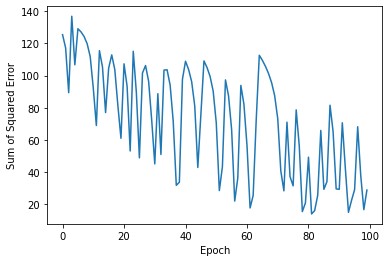

In [42]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

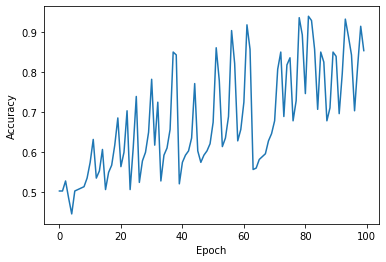

In [43]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

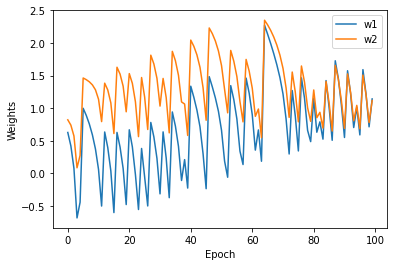

In [44]:
thetas_history = np.array(thetas_history)
plt.plot(thetas_history[:, 1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['w1', 'w2'])